## 1. Load the dataset

In [5]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import zipfile
import pandas as pd

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1RayMjAmn0PhXM0I-bypjFBwU2RtgDwSw'
downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('data.zip') 


path = os.listdir('.')
print (path)


with zipfile.ZipFile("data.zip","r") as datazip:
  datazip.extractall("")


data = pd.read_csv("data.csv") 

     |████████████████████████████████| 993kB 3.5MB/s 


W0630 01:58:21.533350 139982641121152 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

['Colab Notebooks', 'AI（副本）.gdoc', 'AI（副本） (1).gdoc', 'AI（副本）2.gdoc', 'y_train.npy', 'y_test.npy', 'x_train.npy', 'x_test.npy', 'my_model_200.h5', 'data.zip']


In [1]:
# 运行此单元格即可装载您的 Google 云端硬盘。
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls '/content/drive/My Drive'

'AI（副本） (1).gdoc'  'Colab Notebooks'   x_train.npy
 AI（副本）2.gdoc       my_model_200.h5    y_test.npy
 AI（副本）.gdoc        x_test.npy	   y_train.npy


In [0]:
drive_path = '/content/drive/My Drive/'
import os
os.chdir(drive_path) 

In [0]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import RepeatVector, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Normalization

In [0]:
data=data.iloc[100000:150000]

In [0]:
data=data.drop(['UpdateTime', 'UpdateMillisec'],axis=1)
data_norm=(data - data.mean()) / data.std()

In [0]:
data_norm=data_norm.drop(['midPrice', 'LastPrice',
       'Volume', 'LastVolume', 'Turnover', 'LastTurnover', 'AskPrice5',
       'AskPrice4', 'AskPrice3', 'AskPrice2', 'AskPrice1', 'BidPrice1',
       'BidPrice2', 'BidPrice3', 'BidPrice4', 'BidPrice5', 'AskVolume5',
       'AskVolume4', 'AskVolume3', 'AskVolume2', 'AskVolume1', 'BidVolume1',
       'BidVolume2', 'BidVolume3', 'BidVolume4', 'BidVolume5', 'OpenInterest',
       'UpperLimitPrice', 'LowerLimitPrice'],axis=1)

In [0]:
data_norm.

,indicator1,indicator2,indicator3,indicator4,indicator5,indicator6,indicator7,indicator8,indicator9,indicator10,indicator11,indicator12,indicator13,indicator14,indicator15,indicator16,indicator17,indicator18,indicator19,indicator20,indicator21,indicator22,indicator23,indicator24,indicator25,indicator26,indicator27,indicator28,indicator29,indicator30,indicator31,indicator32,indicator33,indicator34,indicator35,indicator36,indicator37,indicator38,indicator39,indicator40,...,indicator69,indicator70,indicator71,indicator72,indicator73,indicator74,indicator75,indicator76,indicator77,indicator78,indicator79,indicator80,indicator81,indicator82,indicator83,indicator84,indicator85,indicator86,indicator87,indicator88,indicator89,indicator90,indicator91,indicator92,indicator93,indicator94,indicator95,indicator96,indicator97,indicator98,indicator99,indicator100,indicator101,indicator102,indicator103,indicator104,indicator105,indicator106,indicator107,indicator108
100000,-0.857386,1.427127,1.403969,-0.000510,-0.405889,-0.011507,-0.170111,0.007826,0.013099,-0.402937,-0.864947,0.000428,0.000302,-0.439914,-1.386964,3.015007,0.805051,-0.278357,-0.270510,-0.847797,0.000733,0.000522,-0.618183,-0.825367,3.799768,1.259753,-0.431841,-0.421682,-0.760578,0.001087,0.000871,-0.267482,-0.626804,0.365512,1.255402,-0.568678,-0.555444,-0.583581,0.001432,0.001196,...,-0.418905,0.994413,0.506731,-0.594776,-0.227794,0.248218,-0.941708,-0.394714,-0.313503,-0.400975,1.195197,-0.726876,0.483943,-0.479044,0.766528,-1.159538,2.699952,-0.978508,-1.222312,1.393114,0.724337,-0.222304,-0.917584,-0.834914,-0.013240,-0.257500,0.503437,-0.029637,-0.149582,-0.184905,0.850491,0.641551,0.568814,0.300551,0.109098,0.014618,-0.099361,-0.228390,-0.279622,0.072510
100001,-0.857386,1.427127,1.404794,-0.000510,-0.405873,-0.011507,-0.164037,0.007826,0.013099,-0.402937,-0.864947,0.000428,0.000302,-0.523480,0.003180,0.002099,0.805051,-0.278357,-0.270510,-0.847797,0.000733,0.000522,-0.618183,-0.825367,3.799768,1.259753,-0.431841,-0.421682,-0.760578,0.001087,0.000871,-0.300791,-0.626804,0.391017,1.255402,-0.568678,-0.555444,-0.583581,0.001432,0.001196,...,-0.418905,0.997228,0.506731,-0.594776,-0.227794,0.233519,-0.941708,-0.388148,-0.313503,-0.400975,1.195197,-0.726876,0.483943,-0.479044,0.766528,-1.159538,2.699952,-0.978508,-1.222312,1.385590,0.718318,-0.207542,-0.918416,-0.835890,-0.256405,-0.257500,0.446319,-0.029637,-0.166191,-0.201672,0.846263,0.641551,-1.758451,0.300551,0.109002,0.014618,-0.088027,-0.225821,-0.278594,0.072510
100002,-0.857386,1.427127,1.404794,-0.000510,-0.405858,-0.011507,-0.156444,0.007826,0.013099,-0.402937,-0.864947,0.000428,0.000302,-0.523480,0.003180,0.002099,0.805051,-0.278357,-0.270510,-0.847797,0.000733,0.000522,-0.618183,-0.825367,3.799768,1.259753,-0.431841,-0.421682,-0.760578,0.001087,0.000871,-0.300791,-0.626804,0.391017,1.255402,-0.568678,-0.555444,-0.583581,0.001432,0.001196,...,-0.418905,1.014485,0.506731,-0.594776,-0.227794,0.233519,-0.941708,-0.381581,-0.313503,-0.400975,1.195197,-0.726876,0.483943,-0.479044,0.766528,-1.159538,2.699952,-0.978508,-1.222312,1.385590,0.718318,-0.207542,-0.918416,-0.835890,-0.256405,-0.257500,0.446319,-0.029637,-0.216019,-0.235205,0.820886,0.677216,-1.758451,0.300551,0.109002,0.014618,-0.149230,-0.174071,-0.279541,0.072510
100003,0.764380,1.427127,1.404516,-0.000510,-0.405843,1.689514,-0.434347,1.084620,0.234781,-0.184721,0.772124,0.000428,0.000302,-0.356347,1.393323,1.489722,0.805051,-0.278357,-0.270510,0.759821,0.000733,0.000522,-0.564534,2.465290,1.882538,1.259753,-0.431841,-0.421682,0.685767,0.001087,0.000871,-0.600577,0.787924,0.948486,1.255402,-0.568678,-0.555444,0.526319,0.001432,0.001196,...,-0.130506,1.014485,0.506731,-0.594710,-0.227667,0.498099,-0.941887,-0.375086,-0.308810,-0.097538,1.191397,-0.726876,0.484216,-0.478956,0.733603,-1.158681,2.726881,-0.976611,-1.222045,1.373192,0.724337,-0.204379,-0.917584,-0.834914,-0.256404,-0.364898,-0.467556,-0.561424,-0.631250,-0.671133,-0.705953,-0.730385,0.568607,0.3

## 3. Build training data
Y not used, so Y do not need normalization

In [0]:
# some parameters
n_samples=len(data_norm)
ratio=0.3
past_n=60
future_n=40 # label值分的不是很开 提高 future_n?
# droplist=['midPrice', 'AskPrice1','BidPrice1','AskVolume1','BidVolume1']


def buildTrain(data,past_n,future_n, data_original):
  X_set=[]
  Y_set=[]
  n_samples=len(data)
  for i in range(0,n_samples-past_n-future_n,1): #step=1
    X_set.append(np.array(data.iloc[i:i+past_n]))
    Y_set.append(np.array(data_original.iloc[i+past_n+future_n-1]["midPrice"]-data_original.iloc[i+past_n-1]["midPrice"]))
  return np.array(X_set), np.array(Y_set)


def shuffle(X,Y):
  np.random.seed(6)
  randomList = np.arange(X.shape[0])
  np.random.shuffle(randomList)
  return X[randomList], Y[randomList]

def tt_split(X,Y,ratio):
  X_train = X[int(X.shape[0]*ratio):]
  Y_train = Y[int(Y.shape[0]*ratio):]
  X_test = X[:int(X.shape[0]*ratio)]
  Y_test = Y[:int(Y.shape[0]*ratio)]
  return X_train, Y_train, X_test, Y_test

X_set, Y_set=buildTrain(data_norm, past_n, future_n, data)

X_set, Y_set=shuffle(X_set, Y_set)

X_train, Y_train, X_test, Y_test = tt_split(X_set, Y_set, ratio)


In [11]:
print(Y_train.max())
print(Y_train.min())

34.0
-152.0


In [12]:
X_train.shape, Y_train.shape

((34930, 60, 108), (34930,))

In [13]:
np.mean(X_train), np.std(X_train), np.mean(Y_train), np.std(Y_train), 

(-0.000729114177315298,
 0.9973500559468892,
 -0.09904093902089894,
 4.755458893649639)

In [14]:
print(Y_train[Y_train>15].size)
print(Y_train[(Y_train>10)&(Y_train<=15)].size)
print(Y_train[(Y_train>5)&(Y_train<=10)].size)
print(Y_train[(Y_train>0)&(Y_train<=5)].size)
print(Y_train[(Y_train>-5)&(Y_train<=0)].size)
print(Y_train[(Y_train>-10)&(Y_train<=-5)].size)
print(Y_train[(Y_train>-15)&(Y_train<=-10)].size)
print(Y_train[(Y_train>-20)&(Y_train<=-15)].size)
print(Y_train[(Y_train>-25)&(Y_train<=-20)].size)
print(Y_train[(Y_train>-30)&(Y_train<=-25)].size)
print(Y_train[(Y_train>-35)&(Y_train<=-30)].size)
print(Y_train[(Y_train>-40)&(Y_train<=-35)].size)
print(Y_train[(Y_train>-45)&(Y_train<=-40)].size)

20
63
570
13336
20034
804
50
26
0
0
0
0
0


In [15]:

print(Y_train[(Y_train>3)].size)
print(Y_train[(Y_train>2)&(Y_train<=3)].size)
print(Y_train[(Y_train>1)&(Y_train<=2)].size)
print(Y_train[(Y_train>0)&(Y_train<=1)].size)
print(Y_train[(Y_train>-1)&(Y_train<=0)].size)
print(Y_train[(Y_train>-2)&(Y_train<=-1)].size)
print(Y_train[(Y_train>-3)&(Y_train<=-2)].size)
print(Y_train[(Y_train<=-3)].size)

2201
1819
3754
6215
7459
6501
3700
3281


In [16]:
Y_test.shape

(14970,)

In [17]:
# def f(x):
# return(10*x)
# a=[1,2,3]
# b=[f(t) for t in a]
# print(b)
def getPatternValue(x):
  if (x>3): 
    return 0
  elif (x>2 and x<=3):
    return 1
  elif (x>1 and x<=2):
    return 2 
  elif (x>0 and x<=1):
    return 3
  elif (x>-1 and x<=0):
    return 4
  elif (x>-2 and x<=-1):
    return 5
  elif (x>-3 and x<=-2):
    return 6
  else:
    return 7
  
pattern_value=[getPatternValue(t) for t in Y_test]
print(len(pattern_value))

14970


In [18]:
print(pattern_value)

[4, 2, 3, 2, 0, 5, 4, 5, 4, 1, 5, 2, 5, 5, 2, 3, 5, 6, 3, 2, 7, 3, 4, 3, 4, 1, 5, 3, 5, 4, 5, 5, 6, 3, 2, 2, 6, 2, 7, 5, 4, 4, 7, 6, 5, 5, 4, 5, 6, 4, 6, 4, 7, 5, 3, 6, 5, 4, 3, 4, 6, 4, 3, 1, 5, 5, 6, 3, 4, 3, 3, 2, 0, 4, 4, 4, 4, 5, 4, 4, 6, 2, 6, 5, 5, 7, 6, 4, 3, 0, 3, 1, 5, 2, 5, 4, 0, 4, 0, 3, 3, 2, 3, 3, 2, 6, 0, 4, 4, 4, 3, 3, 4, 6, 0, 4, 7, 2, 7, 7, 3, 3, 4, 3, 5, 4, 2, 3, 4, 6, 2, 2, 3, 6, 3, 5, 4, 4, 4, 3, 4, 0, 3, 6, 3, 0, 0, 2, 0, 4, 1, 4, 7, 2, 4, 3, 3, 7, 3, 5, 3, 4, 5, 3, 4, 4, 2, 4, 4, 4, 5, 6, 5, 3, 4, 5, 5, 6, 5, 2, 3, 3, 4, 6, 6, 4, 5, 5, 2, 2, 3, 5, 2, 4, 4, 4, 0, 4, 7, 3, 4, 4, 5, 3, 3, 4, 3, 4, 1, 1, 6, 4, 5, 4, 7, 4, 4, 5, 4, 3, 4, 3, 4, 2, 3, 6, 3, 6, 5, 4, 4, 7, 2, 6, 4, 7, 2, 6, 2, 5, 4, 6, 7, 5, 3, 3, 4, 4, 7, 6, 3, 7, 4, 2, 4, 5, 5, 4, 5, 4, 5, 4, 7, 4, 4, 1, 2, 7, 7, 3, 3, 5, 2, 5, 6, 3, 4, 3, 4, 5, 5, 4, 7, 3, 3, 1, 7, 6, 1, 7, 5, 5, 7, 7, 3, 5, 5, 2, 3, 3, 1, 3, 1, 6, 3, 2, 4, 6, 4, 2, 4, 6, 2, 1, 4, 3, 2, 7, 5, 7, 6, 1, 1, 5, 3, 4, 5, 7, 5, 5, 2, 4, 4, 

## 4. build the model

In [19]:
model = Sequential()
model.add(LSTM(100,name='mid', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(100, return_sequences=True))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(loss="mse", optimizer="adam")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mid (LSTM)                   (None, 100)               83600     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 60, 108)           10908     
Total params: 174,908
Trainable params: 174,908
Non-trainable params: 0
_________________________________________________________________


## 5. train the model

In [0]:
callback = [
    ModelCheckpoint(
        'lstm_ae', monitor='loss',
        verbose=1,
        save_best_only=True,
        save_weights_only=True),
    EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")]

In [0]:
model.load_weights('lstm_ae')

In [0]:

model.fit(X_train, X_train, epochs=50, batch_size=512, validation_data=(X_test, X_test), callbacks=callback)

In [0]:
model.save(drive_path+'/my_model_200.h5')
from keras.models import load_model 

In [24]:
from keras.models import load_model 
model = load_model('my_model_200.h5')
# model.fit(X_train, X_train, epochs=3, batch_size=128, validation_data=(X_test, X_test), callbacks=callback)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


## 6. Feature generation

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import sklearn
from sklearn.manifold import TSNE
from keras.models import Model

mid_model = Model(inputs=model.input, outputs=model.get_layer('mid').output)


In [0]:
pattern_raw=mid_model.predict(X_test)


tsne=TSNE(n_components=2,init='pca',random_state=0)
X_tsne=tsne.fit_transform(pattern_raw)

In [0]:
pattern_raw.shape

(14970, 100)

In [63]:
mid_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mid_input (InputLayer)       (None, 60, 108)           0         
_________________________________________________________________
mid (LSTM)                   (None, 100)               83600     
Total params: 83,600
Trainable params: 0
Non-trainable params: 83,600
_________________________________________________________________


In [0]:
X_tsne.shape

(14970, 2)



---
NEW CODE

Use features to predict


---



In [0]:
Y_train_new = [getPatternValue(t) for t in Y_train]
Y_test_new = [getPatternValue(t) for t in Y_test]

In [0]:
np.save('y_train.npy', Y_train_new)
np.save('y_test.npy', Y_test_new)
np.save("x_train.npy", X_train)
np.save("x_test.npy", X_test)

In [31]:
X_train.shape

(34930, 60, 108)

In [0]:
from keras.models import Model
from keras.layers import Dense
from keras import backend as K

x = Dense(2048, activation='relu')(mid_model.output)
x = Dropout(0.5)(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(8, activation='softmax')(x)

model2 = Model(inputs=mid_model.input, outputs=x)


for layer in mid_model.layers:
    layer.trainable = False


model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [65]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mid_input (InputLayer)       (None, 60, 108)           0         
_________________________________________________________________
mid (LSTM)                   (None, 100)               83600     
_________________________________________________________________
dense_29 (Dense)             (None, 2048)              206848    
_________________________________________________________________
dropout_11 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dropout_12 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 16392     
Total para

In [0]:
model2.load_weights('model2.ckpt')

In [66]:
model2.fit(X_train, Y_train_new, epochs=100, batch_size=1024, 
          validation_data=(X_test, Y_test_new),
          callbacks= [
            ModelCheckpoint(
                'model2.ckpt', monitor='val_acc',
                verbose=1,
                save_best_only=True,
                save_weights_only=True),
            EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
           ]
          )

Train on 34930 samples, validate on 14970 samples
Epoch 1/100
34930/34930 [==============================] - 6s 161us/step - loss: 1.9008 - acc: 0.2476 - val_loss: 1.7961 - val_acc: 0.2967

Epoch 00001: val_acc improved from -inf to 0.29673, saving model to model2.ckpt
Epoch 2/100
34930/34930 [==============================] - 4s 113us/step - loss: 1.7214 - acc: 0.3365 - val_loss: 1.5959 - val_acc: 0.3984

Epoch 00002: val_acc improved from 0.29673 to 0.39840, saving model to model2.ckpt
Epoch 3/100
34930/34930 [==============================] - 4s 112us/step - loss: 1.5074 - acc: 0.4290 - val_loss: 1.3610 - val_acc: 0.4971

Epoch 00003: val_acc improved from 0.39840 to 0.49713, saving model to model2.ckpt
Epoch 4/100
34930/34930 [==============================] - 4s 113us/step - loss: 1.3135 - acc: 0.5013 - val_loss: 1.1816 - val_acc: 0.5560

Epoch 00004: val_acc improved from 0.49713 to 0.55605, saving model to model2.ckpt
Epoch 5/100
34930/34930 [==============================] - 4s

In [56]:
model3 = Sequential()
model3.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model3.add(Dense(2048, activation='relu' ))
model3.add(Dropout(0.5))
model3.add(Dense(2048, activation='relu' ))
model3.add(Dropout(0.5))
model3.add(Dense(8, activation='softmax'))
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 6480)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 2048)              13273088  
_________________________________________________________________
dropout_9 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dropout_10 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 16392     
Total params: 17,485,832
Trainable params: 17,485,832
Non-trainable params: 0
________________________________________________________________

In [0]:
model3.load_weights('model3.ckpt')

In [59]:
model3.fit(X_train, Y_train_new, epochs=100, batch_size=1024, 
          validation_data=(X_test, Y_test_new),
          callbacks= [
            ModelCheckpoint(
                'model3.ckpt', monitor='val_acc',
                verbose=1,
                save_best_only=True,
                save_weights_only=True),
            EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
           ]
          )

Train on 34930 samples, validate on 14970 samples
Epoch 1/100
34930/34930 [==============================] - 3s 87us/step - loss: 0.5783 - acc: 0.7789 - val_loss: 1.1253 - val_acc: 0.6435

Epoch 00001: val_acc improved from -inf to 0.64349, saving model to model3.ckpt
Epoch 2/100
34930/34930 [==============================] - 3s 85us/step - loss: 0.5822 - acc: 0.7762 - val_loss: 1.1202 - val_acc: 0.6492

Epoch 00002: val_acc improved from 0.64349 to 0.64916, saving model to model3.ckpt
Epoch 3/100
34930/34930 [==============================] - 3s 83us/step - loss: 0.5775 - acc: 0.7797 - val_loss: 1.1292 - val_acc: 0.6482

Epoch 00003: val_acc did not improve from 0.64916
Epoch 4/100
34930/34930 [==============================] - 3s 83us/step - loss: 0.5968 - acc: 0.7768 - val_loss: 1.1162 - val_acc: 0.6540

Epoch 00004: val_acc improved from 0.64916 to 0.65397, saving model to model3.ckpt
Epoch 5/100
34930/34930 [==============================] - 3s 84us/step - loss: 0.5848 - acc: 0.77

# Others

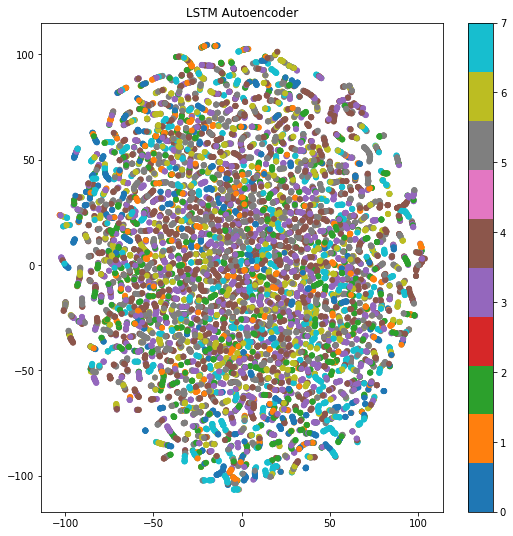

In [0]:
plt.figure(figsize=(9, 9))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=pattern_value, cmap='tab10',linewidths=0.00000001)
plt.colorbar()
plt.title("LSTM Autoencoder")
plt.show()

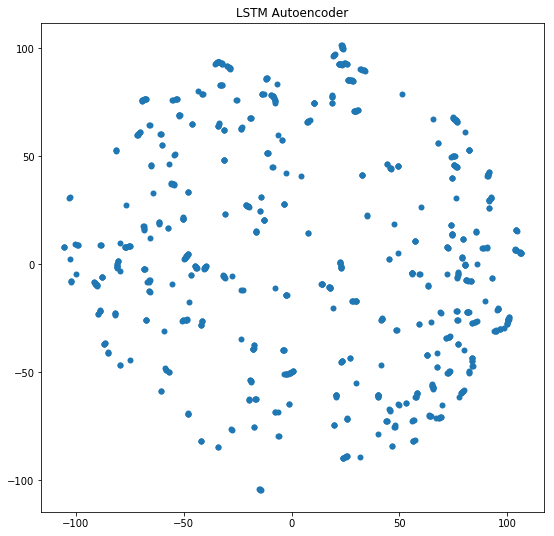

In [0]:
k=0
a=np.array(pattern_value)
b=np.argwhere(a==k)
#print(b)
#print(X_tsne[10])
t=X_tsne[b]
# print(X_tsne)
# print(t)
# print(t[0,0,0])
plt.figure(figsize=(9, 9))
plt.scatter(t[:,0, 0], t[:,0, 1],linewidths=0.00000001)
#plt.colorbar()
plt.title("LSTM Autoencoder")
plt.show()

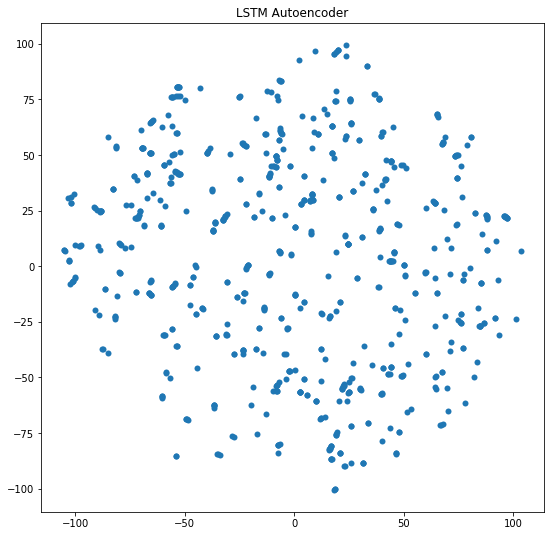

In [0]:
k=1
a=np.array(pattern_value)
b=np.argwhere(a==k)
#print(b)
#print(X_tsne[10])
t=X_tsne[b]
# print(X_tsne)
# print(t)
# print(t[0,0,0])
plt.figure(figsize=(9, 9))
plt.scatter(t[:,0, 0], t[:,0, 1],linewidths=0.00000001)
#plt.colorbar()
plt.title("LSTM Autoencoder")
plt.show()

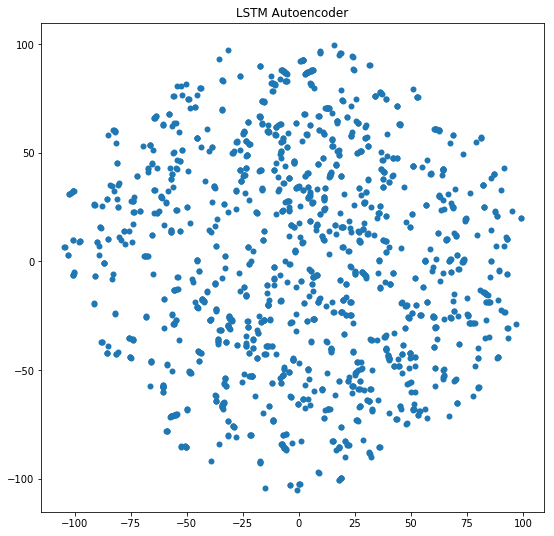

In [0]:
k=2
a=np.array(pattern_value)
b=np.argwhere(a==k)
#print(b)
#print(X_tsne[10])
t=X_tsne[b]
# print(X_tsne)
# print(t)
# print(t[0,0,0])
plt.figure(figsize=(9, 9))
plt.scatter(t[:,0, 0], t[:,0, 1],linewidths=0.00000001)
#plt.colorbar()
plt.title("LSTM Autoencoder")
plt.show()

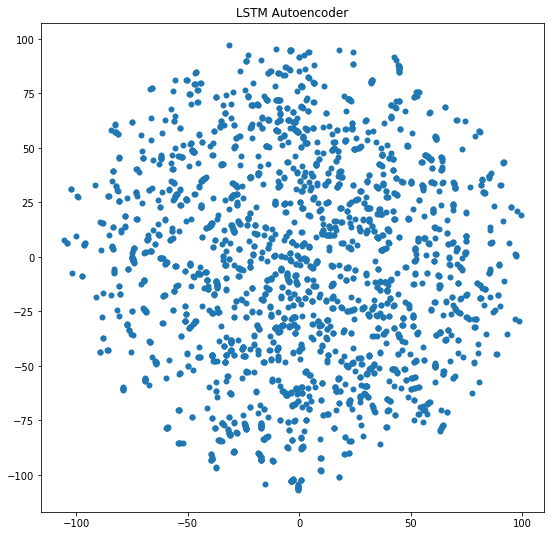

In [0]:
k=3
a=np.array(pattern_value)
b=np.argwhere(a==k)
#print(b)
#print(X_tsne[10])
t=X_tsne[b]
# print(X_tsne)
# print(t)
# print(t[0,0,0])
plt.figure(figsize=(9, 9))
plt.scatter(t[:,0, 0], t[:,0, 1],linewidths=0.00000001)
#plt.colorbar()
plt.title("LSTM Autoencoder")
plt.show()

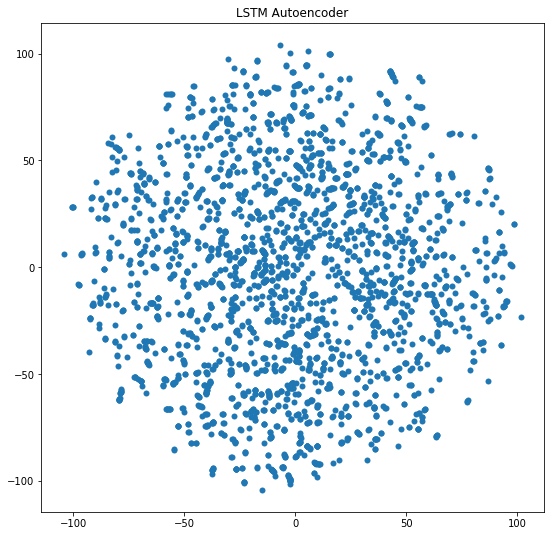

In [0]:
k=4
a=np.array(pattern_value)
b=np.argwhere(a==k)
#print(b)
#print(X_tsne[10])
t=X_tsne[b]
# print(X_tsne)
# print(t)
# print(t[0,0,0])
plt.figure(figsize=(9, 9))
plt.scatter(t[:,0, 0], t[:,0, 1],linewidths=0.00000001)
#plt.colorbar()
plt.title("LSTM Autoencoder")
plt.show()

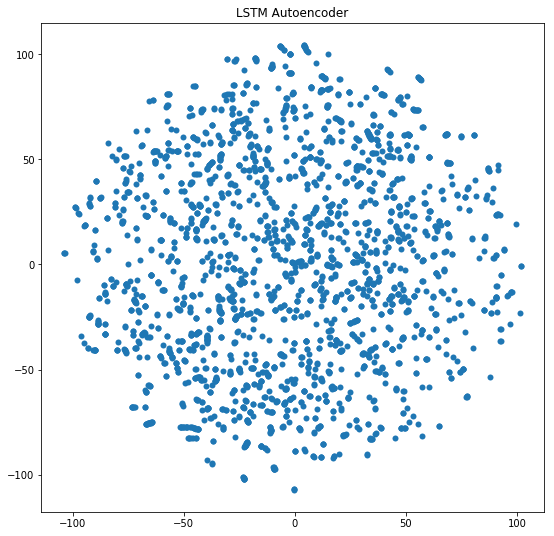

In [0]:
k=5
a=np.array(pattern_value)
b=np.argwhere(a==k)
#print(b)
#print(X_tsne[10])
t=X_tsne[b]
# print(X_tsne)
# print(t)
# print(t[0,0,0])
plt.figure(figsize=(9, 9))
plt.scatter(t[:,0, 0], t[:,0, 1],linewidths=0.00000001)
#plt.colorbar()
plt.title("LSTM Autoencoder")
plt.show()

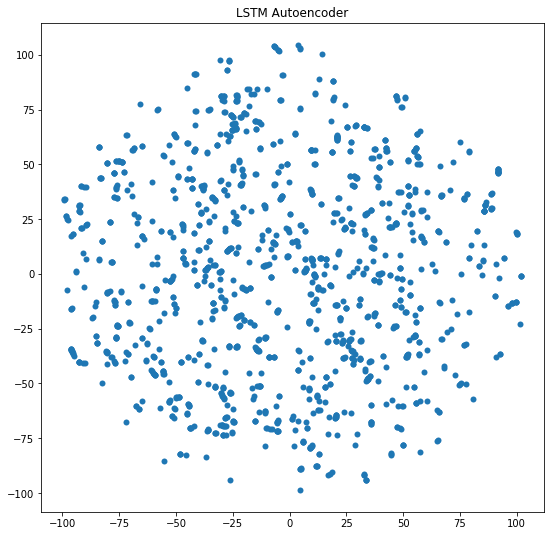

In [0]:
k=6
a=np.array(pattern_value)
b=np.argwhere(a==k)
#print(b)
#print(X_tsne[10])
t=X_tsne[b]
# print(X_tsne)
# print(t)
# print(t[0,0,0])
plt.figure(figsize=(9, 9))
plt.scatter(t[:,0, 0], t[:,0, 1],linewidths=0.00000001)
#plt.colorbar()
plt.title("LSTM Autoencoder")
plt.show()

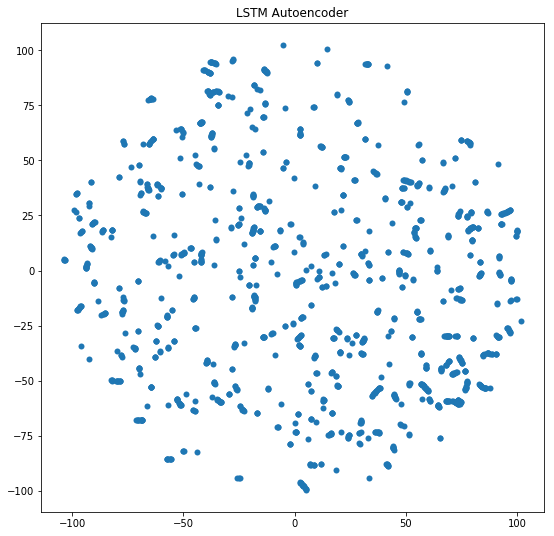

In [0]:
k=7
a=np.array(pattern_value)
b=np.argwhere(a==k)
#print(b)
#print(X_tsne[10])
t=X_tsne[b]
# print(X_tsne)
# print(t)
# print(t[0,0,0])
plt.figure(figsize=(9, 9))
plt.scatter(t[:,0, 0], t[:,0, 1],linewidths=0.00000001)
#plt.colorbar()
plt.title("LSTM Autoencoder")
plt.show()